<a href="https://colab.research.google.com/github/juanC0627/aLATAM/blob/main/ACERCAMIENTO_IMERSION_DE_DATOS_CLASE%202_PYTHON_Y_PANDAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import pandas as pd
inmuebles = pd.read_csv("/content/drive/MyDrive/CLASES DE aLATAM/inmuebles_bogota.csv")

In [3]:
inmuebles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tipo          9520 non-null   object
 1   Descripcion   9520 non-null   object
 2   Habitaciones  9520 non-null   int64 
 3   Baños         9520 non-null   int64 
 4   Área          9520 non-null   int64 
 5   Barrio        9520 non-null   object
 6   UPZ           9478 non-null   object
 7   Valor         9520 non-null   object
dtypes: int64(3), object(5)
memory usage: 595.1+ KB


In [43]:
columnas = { "baños" : "banos" , "Área" : "Area"}
inmuebles = inmuebles.rename(columns=columnas)

In [5]:
type(inmuebles.Valor[0])

str

a pesar que los datos que estan guardados en Valor sean numeros panda los lee o cataloga mos String y esto es lo que pasa cuando se trata de sumar 2 string


el resultado sigue siendo un String y no suma, lo que hace es concatenar los datos 

In [7]:
inmuebles.Valor[0]+inmuebles.Valor[1]+inmuebles.Valor[:5]

0      $ 360.000.000$ 670.000.000$ 360.000.000
1      $ 360.000.000$ 670.000.000$ 670.000.000
2    $ 360.000.000$ 670.000.000$ 1.120.000.000
3      $ 360.000.000$ 670.000.000$ 890.000.000
4      $ 360.000.000$ 670.000.000$ 970.000.000
Name: Valor, dtype: object

para poder tratar los datos le aplicaremos funciones de String

la funcion split lo que hace es separar una cadena de texto en funcion del parametro que se le coloque, si el split se deja sin parametros por defecto toma el espacio

In [8]:
inmuebles.Valor[0].split()

['$', '360.000.000']

ya convertido en String nos devuelve un panda series pero en elemeto de lista

In [17]:
inmuebles.Valor.str.split()

0         [$, 360.000.000]
1         [$, 670.000.000]
2       [$, 1.120.000.000]
3         [$, 890.000.000]
4         [$, 970.000.000]
               ...        
9515      [$, 290.000.000]
9516      [$, 670.000.000]
9517      [$, 900.000.000]
9518      [$, 335.000.000]
9519      [$, 144.990.000]
Name: Valor, Length: 9520, dtype: object

podemos trabajarlo como un data frnd con el parametro expand

In [29]:
valor = inmuebles.Valor.str.split(expand=True)
inmuebles["Moneda"] = valor[0]
inmuebles["Precio"] = valor[1]
inmuebles.sample(3)

,Tipo,Descripcion,Habitaciones,Baños,Área,Barrio,UPZ,Valor,Moneda,Precio
7194,Casa,Casa en venta en Tintala,3,2,59,Tintala,Tintala,$ 159.000.000,$,159.000.000
8263,Apartamento,Apartamento en venta en Rafael Uribe Uribe,3,1,46,Rafael Uribe Uribe,Los Alcázares,$ 155.000.000,$,155.000.000
3013,Casa,Casa en venta en Las Villas,4,3,261,Las Villas,Niza,$ 1.100.000.000,$,1.100.000.000


sin el expand=true no daba columna tipo series y con el parametro nos da un datac con 2 columnas 

lo que hicimos fue nuevas columnas ya con los datos que tenemos de nuestro dataC

In [22]:
inmuebles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tipo          9520 non-null   object
 1   Descripcion   9520 non-null   object
 2   Habitaciones  9520 non-null   int64 
 3   Baños         9520 non-null   int64 
 4   Área          9520 non-null   int64 
 5   Barrio        9520 non-null   object
 6   UPZ           9478 non-null   object
 7   Valor         9520 non-null   object
 8   Moneda        9520 non-null   object
 9   Precio        9520 non-null   object
dtypes: int64(3), object(7)
memory usage: 743.9+ KB


In [32]:
inmuebles["Precio"].sum()

'360000000670000000112000000089000000097000000051000000050000000023500000008500000006420000006520000001680000002050000003000000006800000002519000000420000000620000000239000000160000000042000000062500000027990000001450000000200000000067000000018000000004690000005800000004450000002615000002780000002580000005200000002000000001290000003500000002905000007500000004950000002850000009000000001800000000990000000418000000349000000565000000370000000259000000310000000354000000372000000500000000420000000105000000018500000034900000051500000028700000026500000050000000026150000030000000027800000025800000052000000035000000029050000012900000020000000075000000041800000049500000034900000031000000056500000037000000025900000035400000028500000042000000037200000050000000018500000010500000003490000001800000000900000000990000000225000000148000000331500000300000000103000000019500000020000000016800000032300000027500000051000000017600000068000000068000000021700000010500000003750000004580000002000000000425000000318

al hacer eso no hace operacion si no concatena y no se ha logrado cambiar el string

con este codigo lo que hacemos es reemplazar el carapter de "." 

In [31]:
inmuebles["Precio"] = inmuebles["Precio"].str.replace(".","", regex=True) 

hasta aqui logramos el objetivo que era transformar la columna VAlor que venias con un strin y el separador de miles que era el punto "." utilizando el replace 

In [33]:
inmuebles[["Precio","Barrio"]]

,Precio,Barrio
0,360000000,Zona Noroccidental
1,670000000,Castilla
2,1120000000,Chico Reservado
3,890000000,Usaquén
4,970000000,Bella Suiza
...,...,...
9515,290000000,Kennedy
9516,670000000,Parque Central Bavaria
9517,900000000,Restrepo
9518,335000000,Engativa


aun podemos ver que precio sigue siendo un objeto

In [34]:
inmuebles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tipo          9520 non-null   object
 1   Descripcion   9520 non-null   object
 2   Habitaciones  9520 non-null   int64 
 3   Baños         9520 non-null   int64 
 4   Área          9520 non-null   int64 
 5   Barrio        9520 non-null   object
 6   UPZ           9478 non-null   object
 7   Valor         9520 non-null   object
 8   Moneda        9520 non-null   object
 9   Precio        9520 non-null   object
dtypes: int64(3), object(7)
memory usage: 743.9+ KB


In [35]:
inmuebles["Precio_Millon"] = inmuebles.Precio.astype("float")/1000000
inmuebles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Tipo           9520 non-null   object 
 1   Descripcion    9520 non-null   object 
 2   Habitaciones   9520 non-null   int64  
 3   Baños          9520 non-null   int64  
 4   Área           9520 non-null   int64  
 5   Barrio         9520 non-null   object 
 6   UPZ            9478 non-null   object 
 7   Valor          9520 non-null   object 
 8   Moneda         9520 non-null   object 
 9   Precio         9520 non-null   object 
 10  Precio_Millon  9520 non-null   float64
dtypes: float64(1), int64(3), object(7)
memory usage: 818.2+ KB


In [36]:
inmuebles.describe()

,Habitaciones,Baños,Área,Precio_Millon
count,9520.000000,9520.000000,9520.000000,9520.000000
mean,3.072479,2.447899,146.664706,602.062354
std,2.049856,1.255314,1731.379622,704.602062
min,1.000000,0.000000,2.000000,60.000000
25%,2.000000,2.000000,57.000000,250.000000
50%,3.000000,2.000000,80.000000,409.182500
75%,3.000000,3.000000,135.000000,680.000000
max,110.000000,9.000000,166243.000000,16000.000000


con este codigo lo que hacemos es que sea mas resumido o que sea mas practico de leer

In [39]:
pd.set_option("display.precision",2)
pd.set_option("display.float_format", lambda x: "%.2f" % x)
inmuebles.describe()

,Habitaciones,Baños,Área,Precio_Millon
count,9520.00,9520.00,9520.00,9520.00
mean,3.07,2.45,146.66,602.06
std,2.05,1.26,1731.38,704.60
min,1.00,0.00,2.00,60.00
25%,2.00,2.00,57.00,250.00
50%,3.00,2.00,80.00,409.18
75%,3.00,3.00,135.00,680.00
max,110.00,9.00,166243.00,16000.00


lo que hacemos es buscar un dato especificio con el parametro "loc

In [40]:
inmuebles.loc[inmuebles.Habitaciones == 110]

,Tipo,Descripcion,Habitaciones,Baños,Área,Barrio,UPZ,Valor,Moneda,Precio,Precio_Millon
897,Casa,Casa en venta en La Uribe,110,2,110,La Uribe,Usaquén,$ 480.000.000,$,480000000,480.00


In [44]:
inmuebles.loc[inmuebles.Area == 2]

,Tipo,Descripcion,Habitaciones,Baños,Area,Barrio,UPZ,Valor,Moneda,Precio,Precio_Millon
8401,Apartamento,Apartamento en venta en San Cristobal,3,1,2,San Cristobal,Sosiego,$ 180.000.000,$,180000000,180.00


In [45]:
inmuebles.loc[inmuebles.Baños == 9]

,Tipo,Descripcion,Habitaciones,Baños,Area,Barrio,UPZ,Valor,Moneda,Precio,Precio_Millon
1955,Local,Local en venta en Quinta Camacho,16,9,1050,Quinta Camacho,CHAPINERO: Chicó Lago + El Refugio,$ 5.299.999.744,$,5299999744,5300.00
2090,Local,Local en venta en Chapinero,16,9,650,Chapinero,CHAPINERO: Pardo Rubio + Chapinero,$ 5.800.000.000,$,5800000000,5800.00
2154,Local,Local en venta en Quinta Camacho,16,9,1050,Quinta Camacho,CHAPINERO: Chicó Lago + El Refugio,$ 5.299.999.744,$,5299999744,5300.00
2221,Lote,Lote en venta en Barrios Unidos,8,9,746,Barrios Unidos,Los Andes,$ 2.080.000.000,$,2080000000,2080.00
2264,Casa,Casa en venta en Suba,13,9,633,Suba,Suba,$ 1.970.000.000,$,1970000000,1970.00
2315,Casa,Casa en venta en Teusaquillo,18,9,600,Teusaquillo,Teusaquillo,$ 2.500.000.000,$,2500000000,2500.00
2435,Local,Local en venta en Marly,11,9,486,Marly,CHAPINERO: Pardo Rubio + Chapinero,$ 3.300.000.000,$,3300000000,3300.00
2981,Finca,Finca en venta en Bella Suiza,6,9,800,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 5.000.000.000,$,5000000000,5000.00
3233,Casa,Casa en venta en Teusaquillo,13,9,500,Teusaquillo,Teusaquillo,$ 2.200.000.000,$,2200000000,2200.00
3883,Local,Local en venta en Zona Noroccidental,12,9,490,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 2.700.000.000,$,2700000000,2700.00


<Axes: ylabel='Frequency'>

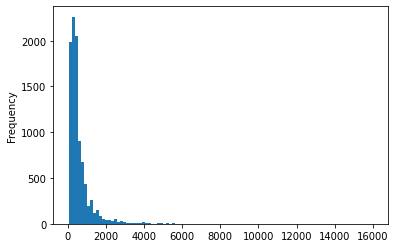

In [49]:
inmuebles["Precio_Millon"].plot.hist(bins=100)

plt.savefig("/content/drive/MyDrive/CLASES DE aLATAM/imagenes/imagenes de clase_png",format="png")

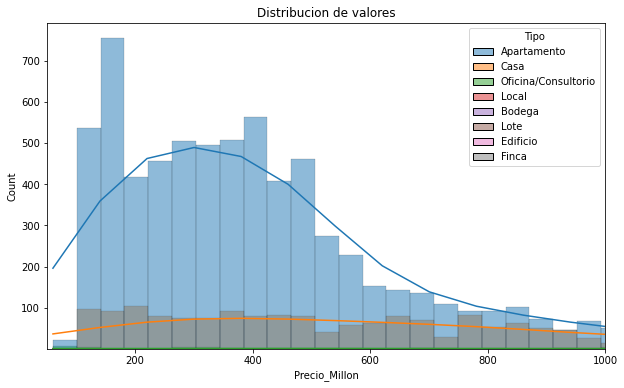

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
grafica = sns.histplot(data=inmuebles, x="Precio_Millon", kde=True, hue="Tipo")
grafica.set_title("Distribucion de valores")
plt.xlim((50,1000))
plt.ylim((0.10))

plt.show()